In [188]:
#[0]
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
import json #https://stackoverflow.com/questions/7100125/storing-python-dictionaries
import pickle #https://stackoverflow.com/questions/11218477/how-can-i-use-pickle-to-save-a-dict
import os
#[1]
from sklearn.manifold import MDS
from scipy.spatial import procrustes
import matplotlib.pyplot as plt

%matplotlib inline

#### DEFINICAO DA ESTRUTURA DO NOSSO DICIONARIO
- Sentiment (somente retirados do nosso faamooooso array já salvo)
    - vectors
    - key_list

In [305]:
#Seleciona somente os vetores principais das nossas embeddings
sentiments = get_sentiments()
raw_embeddings = []
dimensions_size = []
for i in range(4):
    tmp = get_vectors_embedding(i)
    raw_embeddings += [tmp]
    dimensions_size+=[len(get_sentiment_vector(tmp,sentiments[0]))]
#Faz o corte para o menor tamanho de dimensão
n_dimensions = np.min(dimensions_size)
# n_dimensions = 10
mds = MDS(n_components=n_dimensions)
#Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
embeddings = []
for i in range(4):
    tmp_embedding = []
    for s in sentiments:
        tmp_embedding += [get_sentiment_vector(raw_embeddings[i],s)]
    transformed_embedding = mds.fit_transform(tmp_embedding)
    embeddings += [transformed_embedding]
# PROCRUSTE entre embeddings
erros = np.zeros((len(embeddings),len(embeddings)))
for a in range(len(embeddings)):
    for b in range(len(embeddings)):
        embeddings[a],embeddings[b],r = procrustes(embeddings[a],embeddings[b])
        erros[a][b] = (r*1000)//1
erros

array([[  0., 143., 136., 133.],
       [143.,   0.,  43.,  88.],
       [136.,  43.,   0.,  58.],
       [133.,  88.,  58.,   0.]])

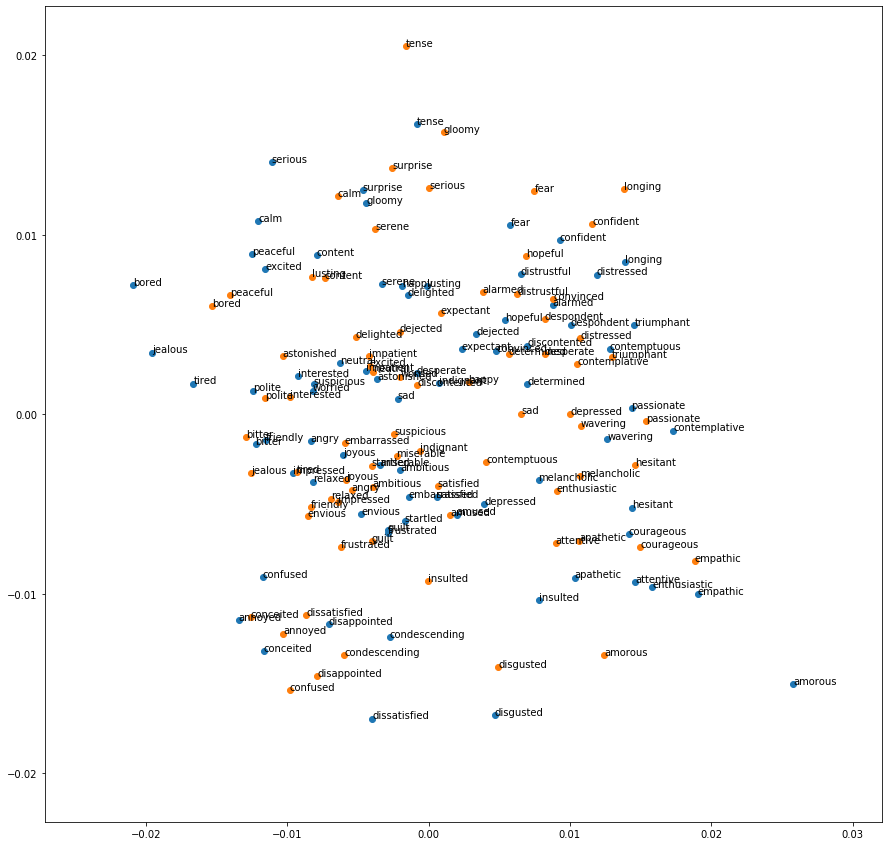

In [306]:
#Plota a sobreposição de 2 modelos
print_anotado2(embeddings[0:2])

In [304]:
def get_clean_embeddings():
#Seleciona somente os vetores principais das nossas embeddings
    sentiments = get_sentiments()
    raw_embeddings = []
    dimensions_size = []
    for i in range(4):
        tmp = get_vectors_embedding(i)
        raw_embeddings += [tmp]
        dimensions_size+=[len(get_sentiment_vector(tmp,sentiments[0]))]
#Faz o corte para o menor tamanho de dimensão
    n_dimensions = np.min(dimensions_size)
    # n_dimensions = 10
    mds = MDS(n_components=n_dimensions)
#Trata embeddings, filtrando somente os sentimentos principais e colocando no numero minimo de dimensoes
    embeddings = []
    for i in range(4):
        tmp_embedding = []
        for s in sentiments:
            tmp_embedding += [get_sentiment_vector(raw_embeddings[i],s)]
        transformed_embedding = mds.fit_transform(tmp_embedding)
        embeddings += [transformed_embedding]
    # Calcula erro entre nossos modelos
    for a in range(len(embeddings)):
        for b in range(len(embeddings)):
            embeddings[a],embeddings[b],r = procrustes(embeddings[a],embeddings[b])
    return embeddings

In [252]:
def print_anotado(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(emb[:,0], emb[:,1])
    n = get_sentiments()
    
    for i, txt in enumerate(n):
        ax.annotate(txt, (emb[:,0][i], emb[:,1][i]))

In [258]:
def print_anotado2(emb):
    fig, ax = plt.subplots(figsize=(15,15))
    for e in emb:
        ax.scatter(e[:,0], e[:,1])
        n = get_sentiments()

        for i, txt in enumerate(n):
            ax.annotate(txt, (e[:,0][i], e[:,1][i]))

In [248]:
def print_2d(embs):
    res = []
    mds_2 = MDS(n_components=2)
    for e in embs:
        res += [mds_2.fit_transform(e)]
    for p in res:
        plt.scatter(p[:,0],p[:,1])

In [12]:
def get_sentiment_vector(embedding, sentiment):
    return embedding[sentiment]["vectors"][sentiment]

In [10]:
def get_vectors_embedding(n):
    files = os.listdir("models")
    model_file_name = []
    for file in files:
        model_file_name += [file]
    escolhidos = [model_file_name[11],model_file_name[14],model_file_name[5],model_file_name[7]]
    with open("models/"+escolhidos[n], 'rb') as handle:
        b = pickle.load(handle)
    return b

In [1]:
def get_sentiments():
    sentiments = np.load("./sentiments_list.npy")
    return sentiments